**660710731 ฟาเซีย เหมียนเอียด**

In [1]:
pip install resampy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(os.getcwd())

/content


In [4]:
data_path = '/content/drive/MyDrive/dst'
print(os.listdir(data_path))

['normal', 'train', 'test', 'val']


In [5]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

normal
train
test
val


In [6]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [7]:
from pickle import dump
from pickle import load

In [8]:
train_data = data_path+"/train"
os.listdir(train_data)

['a_00000110_5000.wav',
 'a_00000119_0.wav',
 'a_00000134_5000.wav',
 'a_00000127_5000.wav',
 'a_00000111_0.wav',
 'a_00000116_5000.wav',
 'a_00000091_5000.wav',
 'a_00000108_5000.wav',
 'a_00000136_0.wav',
 'a_00000128_0.wav',
 'a_00000104_0.wav',
 'a_00000132_5000.wav',
 'a_00000126_0.wav',
 'a_00000102_0.wav',
 'a_00000093_0.wav',
 'a_00000121_0.wav',
 'a_00000112_0.wav',
 'a_00000120_5000.wav',
 'a_00000095_0.wav',
 'a_00000115_0.wav',
 'a_00000127_0.wav',
 'a_00000118_5000.wav',
 'a_00000113_0.wav',
 'a_00000118_0.wav',
 'a_00000128_5000.wav',
 'a_00000109_5000.wav',
 'a_00000110_0.wav',
 'a_00000119_5000.wav',
 'a_00000133_5000.wav',
 'a_00000097_0.wav',
 'a_00000117_0.wav',
 'a_00000098_5000.wav',
 'a_00000095_5000.wav',
 'a_00000131_0.wav',
 'a_00000113_5000.wav',
 'a_00000134_0.wav',
 'a_00000107_0.wav',
 'a_00000130_0.wav',
 'a_00000101_5000.wav',
 'a_00000121_5000.wav',
 'a_00000103_0.wav',
 'a_00000137_5000.wav',
 'a_00000111_5000.wav',
 'a_00000103_5000.wav',
 'a_00000089_

In [9]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000045_0.wav',
 'a_00000036_0.wav',
 'a_00000100_5000.wav',
 'a_00000096_5000.wav',
 'a_00000123_5000.wav',
 'a_00000063_0.wav',
 'a_00000125_0.wav',
 'a_00000074_5000.wav',
 'a_00000130_5000.wav',
 'a_00000106_5000.wav',
 'a_00000041_5000.wav',
 'a_00000116_0.wav',
 'n_00000338_0.wav',
 'a_00000035_5000.wav',
 'a_00000088_0.wav',
 'n_00000363_5000.wav',
 'a_00000079_0.wav',
 'a_00000062_0.wav',
 'a_00000047_5000.wav',
 'n_00000335_5000.wav',
 'n_00000325_5000.wav',
 'a_00000129_5000.wav',
 'a_00000013_5000.wav',
 'a_00000032_5000.wav',
 'a_00000008_5000.wav',
 'a_00000016_0.wav',
 'a_00000012_0.wav',
 'n_00000326_5000.wav',
 'a_00000117_5000.wav',
 'n_00000342_5000.wav',
 'a_00000064_5000.wav',
 'n_00000335_0.wav',
 'a_00000024_0.wav',
 'a_00000135_5000.wav',
 'a_00000115_5000.wav',
 'a_00000022_0.wav',
 'a_00000028_5000.wav',
 'n_00000366_5000.wav',
 'n_00000370_0.wav',
 'n_00000340_0.wav',
 'a_00000104_5000.wav',
 'n_00000372_5000.wav',
 'a_00000007_0.wav',
 'a_00000010_0.wav'

In [10]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000083_0.wav',
 'a_00000091_0.wav',
 'a_00000099_0.wav',
 'a_00000101_0.wav',
 'a_00000105_0.wav',
 'a_00000073_0.wav',
 'a_00000076_0.wav',
 'a_00000124_5000.wav',
 'a_00000065_0.wav',
 'a_00000090_0.wav',
 'a_00000133_0.wav',
 'a_00000126_5000.wav',
 'a_00000066_0.wav',
 'a_00000087_0.wav',
 'a_00000122_5000.wav',
 'a_00000075_0.wav',
 'a_00000124_0.wav',
 'a_00000077_0.wav',
 'a_00000085_5000.wav',
 'a_00000125_5000.wav',
 'a_00000067_5000.wav',
 'a_00000078_5000.wav',
 'a_00000074_0.wav',
 'a_00000068_0.wav',
 'a_00000099_5000.wav',
 'a_00000137_0.wav',
 'n_00000359_0.wav',
 'n_00000347_0.wav',
 'a_00000001_5000.wav',
 'a_00000027_5000.wav',
 'n_00000345_5000.wav',
 'a_00000003_5000.wav',
 'n_00000377_5000.wav',
 'n_00000359_5000.wav',
 'n_00000380_0.wav',
 'a_00000011_5000.wav',
 'n_00000330_0.wav',
 'n_00000329_5000.wav',
 'n_00000318_5000.wav',
 'n_00000320_5000.wav',
 'a_00000011_0.wav',
 'n_00000317_0.wav',
 'n_00000369_0.wav',
 'n_00000371_0.wav',
 'n_00000353_0.wav',
 

In [11]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [12]:
normal_train

'/content/drive/MyDrive/dst/train/n_*.wav'

In [13]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [14]:
import librosa
import librosa.display

In [15]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [16]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [17]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [18]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [19]:
 datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [20]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [21]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [22]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [23]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

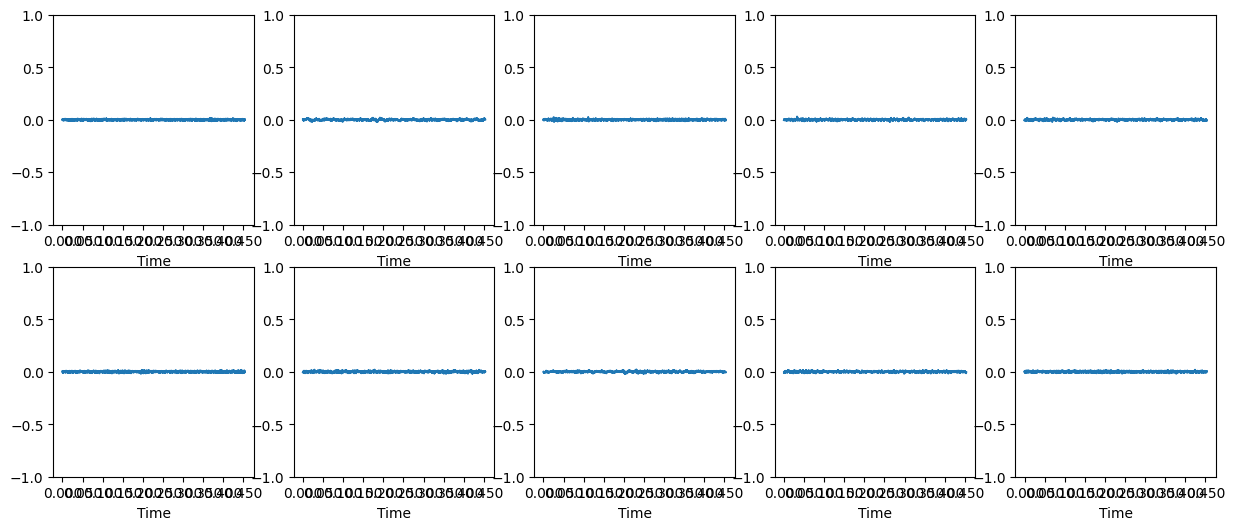

In [24]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

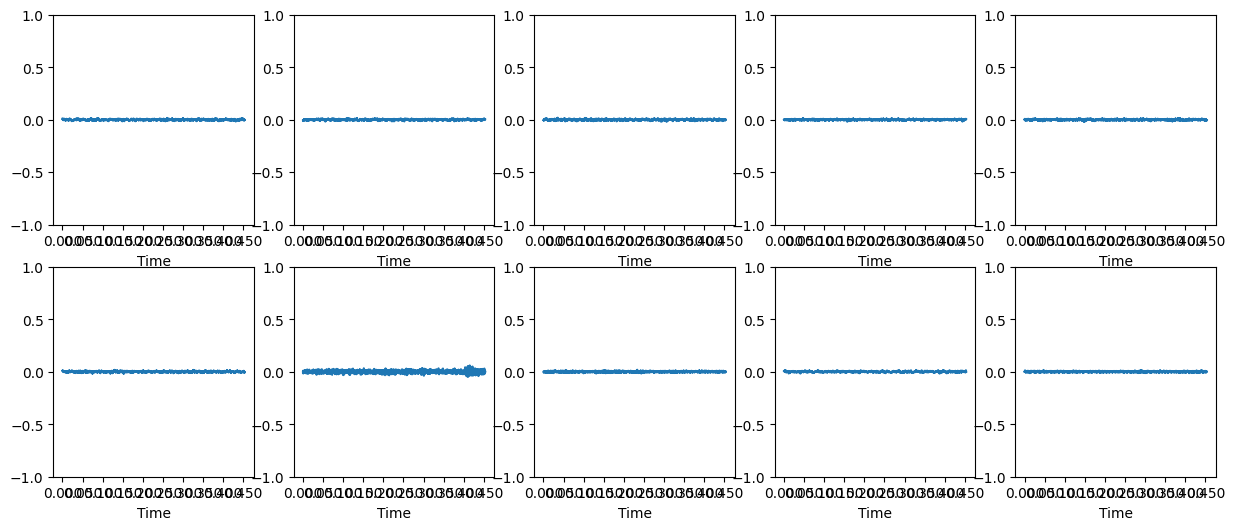

In [25]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [26]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [27]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [28]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [29]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [30]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[3.46679688e-02 1.60557994e+03]
[4.10156250e-02 1.80976244e+03]
[3.85742188e-02 1.67950840e+03]
[6.15234375e-02 2.05330035e+03]


Text(0, 0.5, 'Count')

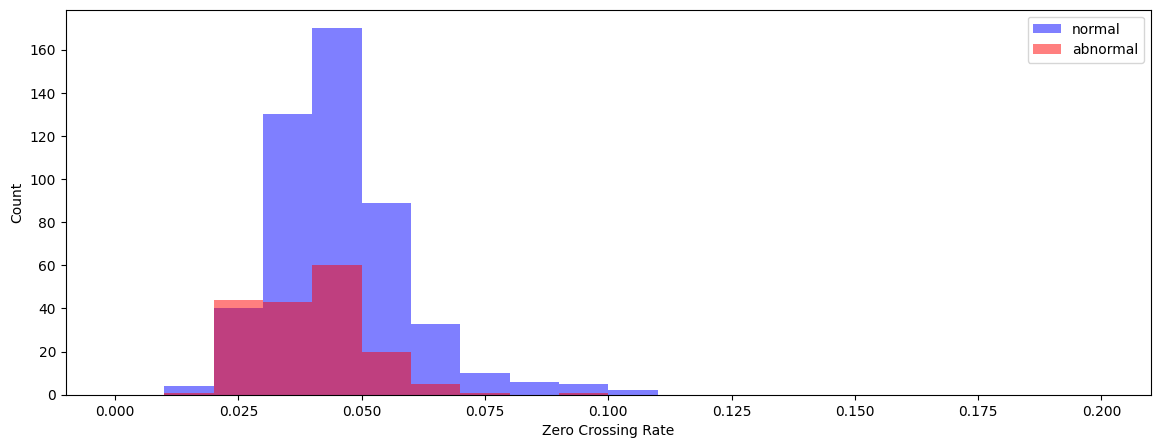

In [31]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

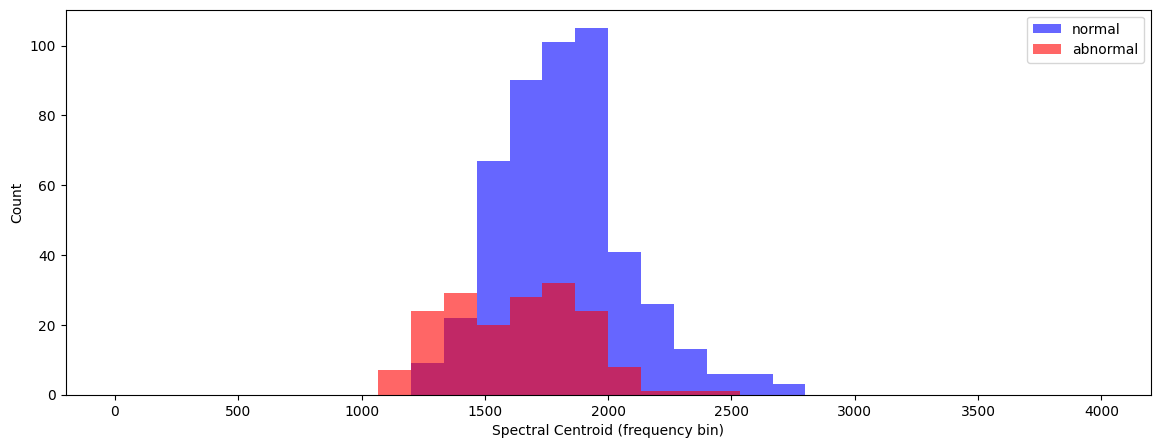

In [32]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [33]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [34]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [35]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [36]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

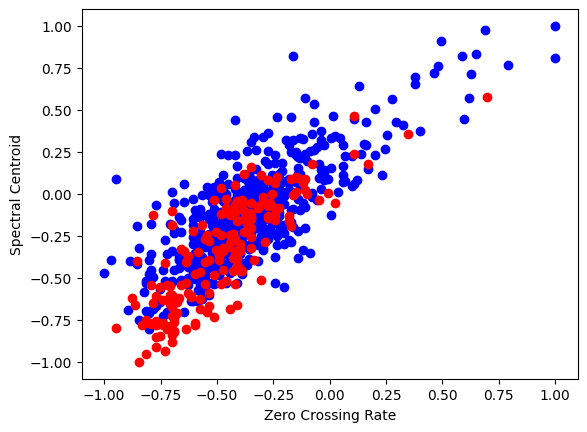

In [37]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [38]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [39]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [40]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [41]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [42]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [43]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [45]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [46]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3776 - loss: 0.6977 - val_accuracy: 0.5542 - val_loss: 0.6915
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7055 - loss: 0.6527 - val_accuracy: 0.7169 - val_loss: 0.6648
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7427 - loss: 0.6403 - val_accuracy: 0.7169 - val_loss: 0.6457
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7201 - loss: 0.6268 - val_accuracy: 0.7169 - val_loss: 0.6328
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7470 - loss: 0.6055 - val_accuracy: 0.7169 - val_loss: 0.6230
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7547 - loss: 0.5907 - val_accuracy: 0.7169 - val_loss: 0.6159
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7368 - loss: 0.5890 - val_accuracy: 0.7169 - val_loss: 0.6110
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7281 - loss: 0.5895 - val_accu

In [48]:
import plotly
import plotly.graph_objs as go

In [49]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [50]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

# Lab week8 - Test

In [51]:
file_name = '/content/drive/MyDrive/dst/test/a_00000011_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


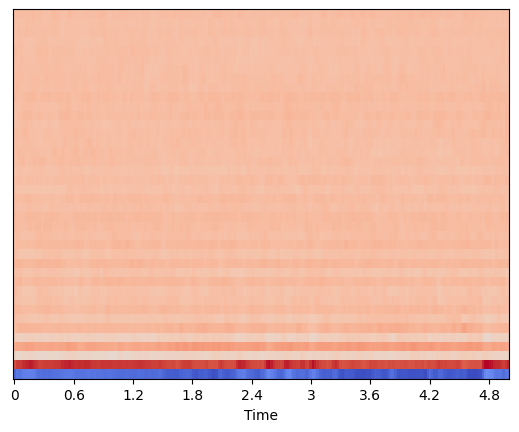

In [52]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [53]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [54]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [55]:
normal_train_features[0].shape

(40, 216)

In [56]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [57]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [58]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [59]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [60]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [61]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [62]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [63]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense


In [66]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [67]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [69]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.6279 - loss: 2.9101
Epoch 1: val_loss improved from inf to 0.47251, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 609ms/step - accuracy: 0.6260 - loss: 2.8549 - val_accuracy: 0.7590 - val_loss: 0.4725
Epoch 2/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7890 - loss: 1.0312 
Epoch 2: val_loss did not improve from 0.47251
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7582 - loss: 1.0998 - val_accuracy: 0.6506 - val_loss: 0.5824
Epoch 3/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6658 - loss: 0.6759 
Epoch 3: val_loss did not improve from 0.47251
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6951 - loss: 0.6762 - val_accuracy: 0.8494 - val_loss: 0.5323
Epoch 4/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6600 - loss: 0.5993 
Epoch 4: val_loss improved from 0.47251 to 0.42132, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accurac

In [70]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [71]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [72]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [73]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.1611, acc: 0.9413
Validation- loss: 0.1799, acc: 0.9277


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


In [75]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 12  35]]


In [76]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9084    1.0000    0.9520       119
    abnormal     1.0000    0.7447    0.8537        47

    accuracy                         0.9277       166
   macro avg     0.9542    0.8723    0.9028       166
weighted avg     0.9343    0.9277    0.9242       166



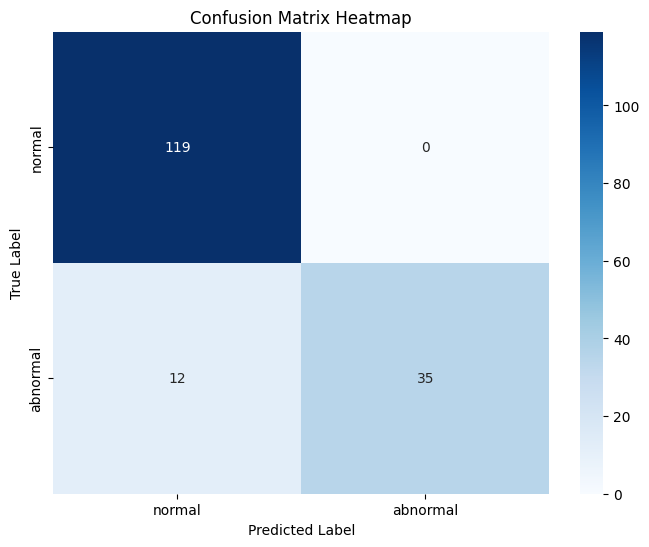

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()